In [11]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
headers = pd.read_csv("ingred_decode.csv", index_col=0)
headers = list(headers["0"].values)
headers

['5-spice',
 'Beetroot',
 'Fenugreek',
 'Fish',
 'Fish sauce',
 'MSG',
 'acai',
 'adodo sauce',
 'agave',
 'agave syrup',
 'aioli sauce',
 'alfalfa sprout',
 'alfredo sauce',
 'all spice',
 'almond',
 'almond butter',
 'almond extract',
 'anchovy',
 'annatto',
 'apple',
 'apple juice',
 'apple sauce',
 'apricot',
 'arrowhead',
 'artichoke heart',
 'arugula',
 'asafoetida',
 'asparagus',
 'avocado',
 'bacon',
 'bacon grease',
 'baked bean',
 'baking mix',
 'baking powder',
 'baking soda',
 'bamboo',
 'banana',
 'barbeque sauce',
 'barley',
 'barley rusk',
 'basil',
 'bay leaf',
 'bean',
 'bean paste',
 'bean salad',
 'bean sauce',
 'bean sprout',
 'bechamel sauce',
 'beef',
 'beer',
 'beet juice',
 'beetroot',
 'bell pepper',
 'berry',
 'biscuit',
 'black bean',
 'black eyed pea',
 'black pepper',
 'blackberry',
 'blueberry',
 'bok choy',
 'bone',
 'bonito flake',
 'bouquet garni',
 'bread',
 'bread mix',
 'breadcrumb',
 'broad bean',
 'broccoli',
 'broccoli rabe',
 'broccolini',
 'brow

In [13]:
data = pd.read_csv("recipes_mapped_encoded.csv", index_col=0)
data = data.drop(["prep time"],axis=1)
data = data.drop(["rating"],axis=1)
data = data.drop(["cuisine"],axis=1)
data.columns = headers
data = data.T
# cols = list(data) 
data

,0,1,2,3,4,5,6,7,8,9,...,6747,6748,6749,6750,6751,6752,6753,6754,6755,6756
5-spice,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Beetroot,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fenugreek,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fish,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fish sauce,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yogurt,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
yuca,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
za'atar,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zest,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
print("Summary Statistics:\n")
summary = data.describe(percentiles=[])
print(np.transpose(np.round(summary)))

Summary Statistics:

      count  mean  std  min  50%  max
0     583.0   0.0  0.0  0.0  0.0  1.0
1     583.0   0.0  0.0  0.0  0.0  1.0
2     583.0   0.0  0.0  0.0  0.0  1.0
3     583.0   0.0  0.0  0.0  0.0  1.0
4     583.0   0.0  0.0  0.0  0.0  1.0
...     ...   ...  ...  ...  ...  ...
6752  583.0   0.0  0.0  0.0  0.0  1.0
6753  583.0   0.0  0.0  0.0  0.0  1.0
6754  583.0   0.0  0.0  0.0  0.0  1.0
6755  583.0   0.0  0.0  0.0  0.0  1.0
6756  583.0   0.0  0.0  0.0  0.0  1.0

[6757 rows x 6 columns]


In [34]:
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_samples, silhouette_score

In [38]:
from kmodes.kmodes import KModes
from sklearn.metrics import silhouette_samples, silhouette_score

In [114]:
max_clusters = 15
df_score = pd.DataFrame(columns = ["NumCluster","Silhouette", "Inertia"])
for i in range(2, max_clusters):
    print("Starting to analyze data using " + str(i) + " number of clusters...")
    kmodes = KModes(n_clusters=i, init="random", n_init = 10, max_iter= 10, random_state = 58)
    kmodes.fit(data) 
    
    goodness = silhouette_score(data,kmodes.predict(data))
    cost = kmodes.cost_
    print("No Clusters =", i," Silhouette = ",goodness, " Cost = ",cost)
    df_score = df_score.append({"NumCluster":i, "Silhouette":goodness, "Cost":cost}, ignore_index = True)

Starting to analyze data using 2 number of clusters...
No Clusters = 2  Silhouette =  0.799703735419845  Cost =  75257.0
Starting to analyze data using 3 number of clusters...
No Clusters = 3  Silhouette =  0.7949349855114565  Cost =  73359.0
Starting to analyze data using 4 number of clusters...
No Clusters = 4  Silhouette =  0.7008958524391635  Cost =  72370.0
Starting to analyze data using 5 number of clusters...
No Clusters = 5  Silhouette =  0.7014767190709387  Cost =  71964.0
Starting to analyze data using 6 number of clusters...
No Clusters = 6  Silhouette =  0.5179502483815086  Cost =  70781.0
Starting to analyze data using 7 number of clusters...
No Clusters = 7  Silhouette =  0.675651752758572  Cost =  70258.0
Starting to analyze data using 8 number of clusters...
No Clusters = 8  Silhouette =  -0.33813616399167723  Cost =  69768.0
Starting to analyze data using 9 number of clusters...
No Clusters = 9  Silhouette =  -0.31541397862830994  Cost =  68664.0
Starting to analyze da

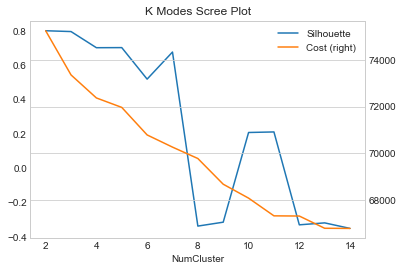

In [115]:
# scree chart
plt.style.use('seaborn-whitegrid')
ax = plt.gca()
df_score.plot(x='NumCluster', y='Silhouette',markerfacecolor='None',markeredgecolor='k', ax=ax)
df_score.plot(x='NumCluster', y='Cost',markerfacecolor='None',markeredgecolor='k', ax=ax, secondary_y=True)
plt.title('K Modes Scree Plot',fontsize=12)
plt.xlabel("Number of Clusters",fontsize=12)
plt.show()

In [154]:
clusters = 11
kmodes = KModes(clusters,init="random", n_init = 10, max_iter= 10, random_state = 58)
kmodes.fit(data) 

goodness = silhouette_score(data,kmodes.predict(data))
cost = kmodes.cost_
print("No Clusters =", clusters," Silhouette = ",goodness, " Cost = ",cost)

No Clusters = 11  Silhouette =  0.21039900314705223  Cost =  67309.0


In [155]:
temp = data
temp["Cluster"] = kmodes.predict(data)
# find number of members in each cluster
count = temp.groupby('Cluster')['Cluster'].count()
# find cluster averages
cluster_centroids = pd.DataFrame(kmodes.cluster_centroids_[:,:-1])
cluster_centroids

,0,1,2,3,4,5,6,7,8,9,...,6747,6748,6749,6750,6751,6752,6753,6754,6755,6756
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [156]:
cluster_centroids['Count'] = count
print(np.transpose(cluster_centroids.sort_values(by = "Count", ascending = False)))

        3   6   1   2   7   9   8   5   0   4   10
0        0   0   0   0   0   0   0   0   0   0   0
1        0   0   0   1   0   0   0   0   0   0   0
2        0   0   0   0   0   0   1   0   0   0   0
3        0   0   0   0   0   0   0   0   0   0   0
4        0   0   0   1   0   0   0   0   0   0   0
...    ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
6753     0   0   0   0   0   0   1   0   0   0   1
6754     0   0   1   0   0   0   1   1   0   0   0
6755     0   0   0   0   0   0   1   1   0   0   0
6756     0   0   0   0   0   0   1   1   0   0   1
Count  550   8   5   4   4   4   3   2   1   1   1

[6758 rows x 11 columns]


In [170]:
temp_group = temp.groupby('Cluster')
df = temp_group.get_group(9)
df = df.loc[:, (df != 0).any(axis=0)]
df

,1,2,12,13,14,15,19,24,29,30,...,6679,6680,6681,6683,6708,6709,6713,6740,6747,Cluster
ginger,0,0,1,1,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,9
sesame oil,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,9
soy sauce,0,0,1,1,0,0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,9
vinegar,1,1,1,1,0,0,1,0,1,1,...,0,1,0,0,1,1,1,1,1,9
